In [1]:
# import sys

# # Print the contents of sys.path
# for path in sys.path:
#     print(path)

In [2]:
# import sys

# # Save the original sys.path
# original_sys_path = sys.path.copy()

# # Remove paths that are not compatible with Miniconda from sys.path
# # non_compatible_paths = ['/path/to/non/compatible/directory']
# # sys.path = [p for p in sys.path if p not in non_compatible_paths]

# # Now proceed with your Conda installation or environment creation

# !wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh && bash Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local


# # Restore the original sys.path
# # sys.path = original_sys_path


In [3]:
# !conda init

In [4]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [5]:
# %cd gdrive/My Drive/'Oxford Thesis'/my_code/aggVAE
# !ls

In [6]:
# ! conda env create -f environment.yml

In [7]:
# ! conda init

In [8]:
# import sys

# # Print the paths where Python interpreter is located
# print(sys.executable)

# # Print the parent directory of the Python interpreter
# print(sys.executable.split('python')[0])

In [9]:
# import sys
# print(sys.version)

In [10]:
# !apt-get install python3.12

In [11]:
# !python3.12 --version

In [12]:
# !source activate addVAE_env_selena

In [13]:
# !conda install dill==0.3.4
# # !pip install shapely==2.0.3
# # !pip install geopandas==0.14.3
# # !pip install arviz==0.18.0
# !conda install numpyro==0.7.1
# !conda install jax==0.2.17
# # !pip install jaxlib==0.4.25

In [14]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [15]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/'Oxford Thesis'/my_code/aggVAE
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Oxford Thesis/my_code/aggVAE
aggVAE_colab.ipynb  environment.yml  Miniconda3-latest-Linux-x86_64.sh	  test_outgoing.ipynb
aggVAE.ipynb	    figures	     Miniconda3-latest-Linux-x86_64.sh.1
data		    LICENSE	     Miniconda3-latest-Linux-x86_64.sh.2
decoders	    MCMCs	     README.md


In [39]:
import jax

print("JAX backend:", jax.lib.xla_bridge.get_backend().platform)
print("CUDA available:", jax.devices("gpu"))

RuntimeError: Unknown backend: 'gpu' requested, but no platforms that are instances of gpu are present. Platforms present are: cpu

In [16]:
# # Set JAX config to use GPU
# import os
# os.environ["XLA_FLAGS"] = "--xla_gpu_devices=0"  # Set the GPU device index

In [17]:
# !pip install pip==24.0
# !pip install dill==0.3.8
# !pip install shapely==2.0.3
# !pip install geopandas==0.14.3
# !pip install arviz==0.18.0
# !pip install numpyro==0.14.0
# !pip install jax==0.4.25
# !pip install jaxlib==0.4.25

In [40]:
! pip install --upgrade pip
! pip install --upgrade jax jaxlib

In [41]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [19]:
# general libraries
import time
import math
import numpy as np
from shapely import geometry
from shapely.geometry import Polygon
import matplotlib
import matplotlib.pyplot as plt
import pickle
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
# import dill
import geopandas
import geopandas as gpd
import matplotlib.colors as colors


# JAX
import jax
import jax.numpy as jnp

jax.config.update('jax_platform_name', 'gpu')  # Use GPU

from jax import random, lax, jit, ops
from jax.example_libraries import stax
# previously was "from jax.experimental import stax" due to previous versions of jax


# Numpyro
import numpyro
from numpyro.infer import SVI, MCMC, NUTS, init_to_median, Predictive, RenyiELBO
import numpyro.distributions as dist
from numpyro.diagnostics import hpdi
from numpyro import optim

print(jax.__version__)
print(numpyro.__version__)

0.4.28
0.14.0


## Read shape files

In [20]:
shape_new = gpd.read_file('data/Shapefiles/zmb_admbnda_adm1_dmmu_20201124.shp')
shape_new = shape_new[['ADM1_EN', 'geometry']]
shape_new['new'] = 1
shape_new

,ADM1_EN,geometry,new
0,Central,"POLYGON ((29.99949 -12.00267, 30.00002 -12.002...",1
1,Copperbelt,"POLYGON ((27.94644 -12.28198, 27.95514 -12.297...",1
2,Eastern,"POLYGON ((33.25764 -11.58238, 33.26164 -11.585...",1
3,Luapula,"POLYGON ((29.37374 -8.70908, 29.36164 -8.72298...",1
4,Lusaka,"POLYGON ((29.98254 -14.64278, 29.98494 -14.643...",1
5,Muchinga,"POLYGON ((32.16182 -9.05766, 32.19187 -9.09042...",1
6,North-Western,"POLYGON ((24.15075 -11.02947, 24.15078 -11.029...",1
7,Northern,"POLYGON ((30.48184 -8.28098, 30.48544 -8.28408...",1
8,Southern,"POLYGON ((27.61591 -15.52350, 27.61987 -15.524...",1
9,Western,"POLYGON ((22.03129 -13.73621, 22.03666 -13.738...",1


<Axes: >

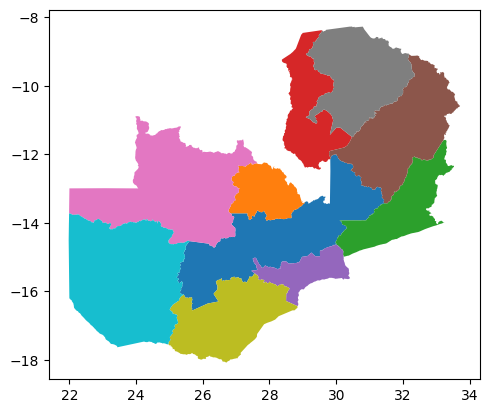

In [21]:
fig, ax = plt.subplots(ncols=1, sharex=True, sharey=True)
shape_new.plot(ax=ax, column='ADM1_EN')

<Axes: >

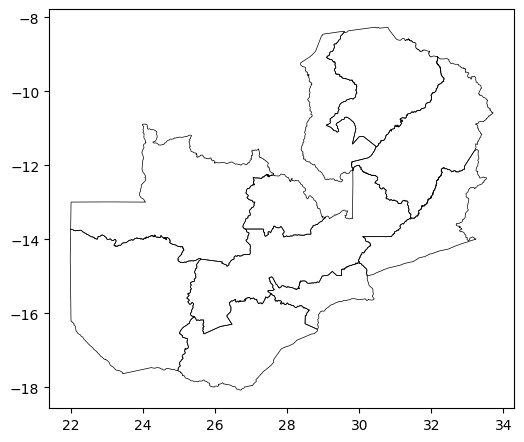

In [22]:
shape_new.boundary.plot(linewidth=0.5,  edgecolor='black', figsize=(6,6))
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
#plt.savefig('res/boundaries_after2010.pdf')

In [23]:
# capitalise unit names
names_shape_new = shape_new['ADM1_EN'].values
shape_new['ADM1_EN'] =  np.array([names_shape_new[i].upper() for i in range(len(names_shape_new))])
shape_new.head(5)

,ADM1_EN,geometry,new
0,CENTRAL,"POLYGON ((29.99949 -12.00267, 30.00002 -12.002...",1
1,COPPERBELT,"POLYGON ((27.94644 -12.28198, 27.95514 -12.297...",1
2,EASTERN,"POLYGON ((33.25764 -11.58238, 33.26164 -11.585...",1
3,LUAPULA,"POLYGON ((29.37374 -8.70908, 29.36164 -8.72298...",1
4,LUSAKA,"POLYGON ((29.98254 -14.64278, 29.98494 -14.643...",1


In [24]:
names_shape_new = shape_new['ADM1_EN'].values
names_shape_new

array(['CENTRAL', 'COPPERBELT', 'EASTERN', 'LUAPULA', 'LUSAKA',
       'MUCHINGA', 'NORTH-WESTERN', 'NORTHERN', 'SOUTHERN', 'WESTERN'],
      dtype=object)

# Malaria data

In [25]:
infections_new = pd.read_csv("../../data/dhs/ZMB_prev_data_admin1.csv")
infections_new = infections_new[['unit', 'usage', 'num_rdt', 'num_rdt_positive', 'prev_estimate']]
infections_new = infections_new.rename({'unit': 'area'}, axis='columns')
infections_new = infections_new.sort_values(by=['area'])
infections_new.head(5)

,area,usage,num_rdt,num_rdt_positive,prev_estimate
3,Central,0.379661,2073.082241,105.938283,0.051102
1,Copperbelt,0.444083,3490.462209,420.221728,0.120391
0,Eastern,0.547537,3013.083502,194.763008,0.064639
6,Luapula,0.614999,1627.434474,89.950700,0.055271
9,Lusaka,0.222109,4881.258989,628.867127,0.128833


## Merge infections and shape

In [26]:
names_infections_new = infections_new.area.values
shape_new = shape_new.rename({'ADM1_EN': 'area'}, axis='columns')
shape_new = shape_new.sort_values(by=['area'])
shape_new.head(3)
names_shape_new = shape_new['area'].values
print(names_infections_new)
print(names_shape_new)

['Central' 'Copperbelt' 'Eastern' 'Luapula' 'Lusaka' 'Muchinga'
 'North Western' 'Northern' 'Southern' 'Western']
['CENTRAL' 'COPPERBELT' 'EASTERN' 'LUAPULA' 'LUSAKA' 'MUCHINGA'
 'NORTH-WESTERN' 'NORTHERN' 'SOUTHERN' 'WESTERN']


In [27]:
names_infections_new[6] = 'North-Western'
# convert to uppercase
names_infections_new = [names_infections_new[i].upper() for i in range(len(names_infections_new))]
print(names_infections_new)
print(names_shape_new)

['CENTRAL', 'COPPERBELT', 'EASTERN', 'LUAPULA', 'LUSAKA', 'MUCHINGA', 'NORTH-WESTERN', 'NORTHERN', 'SOUTHERN', 'WESTERN']
['CENTRAL' 'COPPERBELT' 'EASTERN' 'LUAPULA' 'LUSAKA' 'MUCHINGA'
 'NORTH-WESTERN' 'NORTHERN' 'SOUTHERN' 'WESTERN']


In [28]:
names_shape_new_lst = list(names_shape_new)
lst = [names_shape_new_lst[i] not in names_infections_new for i in range(len(names_shape_new))]
[i for i in range(len(lst)) if lst[i] == True]

[]

In [29]:
infections_new.area = names_infections_new
infections_new

,area,usage,num_rdt,num_rdt_positive,prev_estimate
3,CENTRAL,0.379661,2073.082241,105.938283,0.051102
1,COPPERBELT,0.444083,3490.462209,420.221728,0.120391
0,EASTERN,0.547537,3013.083502,194.763008,0.064639
6,LUAPULA,0.614999,1627.434474,89.950700,0.055271
9,LUSAKA,0.222109,4881.258989,628.867127,0.128833
4,MUCHINGA,0.570684,1436.135923,67.596165,0.047068
8,NORTH-WESTERN,0.482494,1291.284642,60.660640,0.046977
2,NORTHERN,0.592238,1992.388614,107.870632,0.054141
5,SOUTHERN,0.429838,2850.930546,345.899545,0.121329
7,WESTERN,0.527002,1328.493995,129.634803,0.097580


In [30]:
shape_new = shape_new.merge(infections_new, how='left', left_on='area', right_on='area')
shape_new.head(3)

,area,geometry,new,usage,num_rdt,num_rdt_positive,prev_estimate
0,CENTRAL,"POLYGON ((29.99949 -12.00267, 30.00002 -12.002...",1,0.379661,2073.082241,105.938283,0.051102
1,COPPERBELT,"POLYGON ((27.94644 -12.28198, 27.95514 -12.297...",1,0.444083,3490.462209,420.221728,0.120391
2,EASTERN,"POLYGON ((33.25764 -11.58238, 33.26164 -11.585...",1,0.547537,3013.083502,194.763008,0.064639


In [31]:
np.sum(np.isnan(shape_new.num_rdt))

0

In [32]:
s_new = shape_new.rename({'num_rdt': 'n_obs', 'num_rdt_positive': 'y', 'prev_estimate': 'estimate'}, axis='columns')
s_new['y'] = round(s_new['y']).astype(int)
s_new['n_obs'] = round(s_new['n_obs']).astype(int)
s_new.head(3)

,area,geometry,new,usage,n_obs,y,estimate
0,CENTRAL,"POLYGON ((29.99949 -12.00267, 30.00002 -12.002...",1,0.379661,2073,106,0.051102
1,COPPERBELT,"POLYGON ((27.94644 -12.28198, 27.95514 -12.297...",1,0.444083,3490,420,0.120391
2,EASTERN,"POLYGON ((33.25764 -11.58238, 33.26164 -11.585...",1,0.547537,3013,195,0.064639


Text(0.5, 1.0, 'usage')

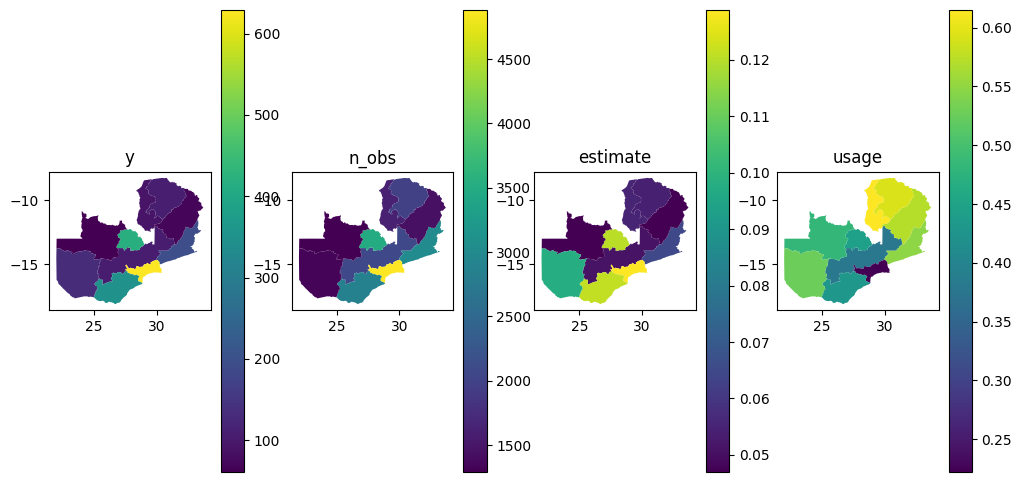

In [33]:
fig, ax = plt.subplots(1, 4, figsize=(12,6))
s_new.plot(column="y", ax=ax[0], legend=True)
s_new.plot(column="n_obs", ax=ax[1], legend=True)
s_new.plot(column="estimate", ax=ax[2], legend=True)
s_new.plot(column="usage", ax=ax[3], legend=True)
ax[0].set_title( 'y')
ax[1].set_title( 'n_obs')
ax[2].set_title( 'estimate')
ax[3].set_title( 'usage')

In [34]:
del shape_new
del infections_new

## Computational grid

In [35]:
x_min, x_max, y_min, y_max = 21.5, 34, -19, -8
dy = y_max - y_min
dx = x_max - x_min
factor = dy / dx
n_x = 20 # have to reduce grid, instead of 40, due to limited GPU memory
n_y = math.ceil(n_x * factor)
print(n_x)
print(n_y)
print(n_x * n_y)

x_grid = np.linspace(x_min, x_max, n_x, endpoint=True)
y_grid = np.linspace(y_min, y_max, n_y, endpoint=True)

# full coordinate arrays
x_coords, y_coords = np.meshgrid(x_grid, y_grid)
x_coords = x_coords.reshape(-1)
y_coords = y_coords.reshape(-1)

df = pd.DataFrame({'Latitude': y_coords, 'Longitude': x_coords})

grid_pts = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

x = jnp.array([x_coords, y_coords]).transpose((1, 0))
print(x.shape)

20
18
360


RuntimeError: Unknown backend: 'gpu' requested, but no platforms that are instances of gpu are present. Platforms present are: cpu

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
divider = make_axes_locatable(ax)
s_new.plot(ax=ax, color='white', edgecolor='black')
grid_pts.plot(ax=ax, marker='o', color='red', markersize=2)

#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
#plt.savefig('res/comp_grid.pdf')

In [ ]:
def pol_pts(shape, grid_pts):
    grid_pts.set_crs(epsg=4326, inplace=True);
    grid_pts.crs == shape.crs

    n_pol = len(shape.geometry)
    n_pts = len(grid_pts.geometry)

    pl_pt = np.zeros((n_pol, n_pts), dtype=int)

    pt_which_pol = np.zeros(n_pts, dtype=int)

    for i_pol in range(n_pol):
        pol = shape.geometry[i_pol]
        for j_pts in range(n_pts):
            pt = grid_pts.geometry[j_pts]
            if pol.contains(pt):
                pl_pt[i_pol, j_pts] = 1
                pt_which_pol[j_pts] = i_pol + 1 # note the enumeration!

    return([pl_pt, pt_which_pol])

In [ ]:
pol_pt_new, pt_which_pol_new = pol_pts(s_new, grid_pts)
pol_sums_new = np.sum(pol_pt_new, axis=1) # how many points in each polygon
print(all(item > 0 for item in pol_sums_new)) # in each polygon there is at least one point
grid_pts['pt_which_pol_new'] = pt_which_pol_new
grid_pts.head(2)

In [ ]:
# pol_pt_old, pt_which_pol_old = pol_pts(s_old, grid_pts)
# pol_sums_old = np.sum(pol_pt_old, axis=1) # how many points in each polygon
# print(all(item > 0 for item in pol_sums_old)) # in each polygon there is at least one point
# grid_pts['pt_which_pol_old'] = pt_which_pol_old
# grid_pts.head(2)

In [ ]:
grid_pts['in_out_new'] = grid_pts['pt_which_pol_new'].apply(lambda x: 'out' if x==0 else 'in')
grid_pts['marker_size_new'] = grid_pts['pt_which_pol_new'].apply(lambda x: 1 if x==0 else 12)
n_pol_new = len(s_new.geometry)

# grid_pts['in_out_old'] = grid_pts['pt_which_pol_old'].apply(lambda x: 'out' if x==0 else 'in')
# grid_pts['marker_size_old'] = grid_pts['pt_which_pol_old'].apply(lambda x: 1 if x==0 else 12)
# n_pol_old = len(s_old.geometry)

In [ ]:
cmap = plt.cm.prism  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5, .5, .5, 1.0)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

In [ ]:
fig, ax2 = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(6,6))
divider = make_axes_locatable(ax)

# define the bins and normalize
bounds_new = np.linspace(min(pt_which_pol_new), max(pt_which_pol_new), n_pol_new)
norm_new = matplotlib.colors.BoundaryNorm(bounds_new, cmap.N)
s_new.plot(ax=ax2, color='white', edgecolor='black')
grid_pts.plot(ax=ax2, marker='o', column='pt_which_pol_new', markersize='marker_size_new', cmap=cmap)
#ax2.title.set_text('After 2010')

#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
#plt.savefig('res/grid_polygons_after.pdf')

In [ ]:
s_new.head(3)

In [ ]:
type(s_new)

In [ ]:
s = s_new
# s = pd.concat([s_old, s_new])
# s.head()
# print(s.shape)

# Traditional prevalence model

In [ ]:
# draw GP samples on the grid

def dist_euclid(x, z):
    x = jnp.array(x)
    z = jnp.array(z)
    if len(x.shape)==1:
        x = x.reshape(x.shape[0], 1)
    if len(z.shape)==1:
        z = x.reshape(x.shape[0], 1)
    n_x, m = x.shape
    n_z, m_z = z.shape
    assert m == m_z
    delta = jnp.zeros((n_x,n_z))
    for d in jnp.arange(m):
        x_d = x[:,d]
        z_d = z[:,d]
        delta += (x_d[:,jnp.newaxis] - z_d)**2
    return jnp.sqrt(delta)


def exp_sq_kernel(x, z, var, length, noise, jitter=1.0e-4):
    dist = dist_euclid(x, z)
    deltaXsq = jnp.power(dist/ length, 2.0)
    k = var * jnp.exp(-0.5 * deltaXsq)
    k += (noise + jitter) * jnp.eye(x.shape[0])
    return k

In [ ]:
def M_g(M, g):
    '''
    - $M$ is a matrix with binary entries $m_{ij},$ showing whether point $j$ is in polygon $i$
    - $g$ is a vector of GP draws over grid
    - $maltmul(M, g)$ gives a vector of sums over each polygon
    '''
    M = jnp.array(M)
    g = jnp.array(g).T
    return(jnp.matmul(M, g))

# Train VAE

In [ ]:
args = {'n_obs': jnp.array(s.n_obs),
        "x": x,
        "gp_kernel": exp_sq_kernel,
        "jitter": 1e-4,
        # "M_old": pol_pt_old,
        "M_new": pol_pt_new,

        # VAE training
        "rng_key": random.PRNGKey(5),
        "num_epochs": 50,
        #"learning_rate": 1.0e-3,
        "learning_rate": 0.0005,
        "batch_size": 100,
        "hidden_dim": 50,
        "z_dim": 40,
        "num_train": 100,
        "num_test":100,
        "vae_var": 1
}

In [ ]:
def gp_aggr(args):

    x = args["x"]
    gp_kernel=args["gp_kernel"]
    jitter = args["jitter"]
    # M_old = args["M_old"]
    M_new = args["M_new"]

    # random effect - aggregated GP
    length = numpyro.sample("kernel_length", dist.InverseGamma(3,3))
    var = numpyro.sample("kernel_var", dist.HalfNormal(0.05))
    k = gp_kernel(x, x, var, length, jitter)
    f = numpyro.sample("f", dist.MultivariateNormal(loc=jnp.zeros(x.shape[0]), covariance_matrix=k))

    # aggregate f into gp_aggr according to indexing of (point in polygon)
    # gp_aggr_old = numpyro.deterministic('gp_aggr_old', M_g(M_old, f))
    gp_aggr_new = numpyro.deterministic('gp_aggr_new', M_g(M_new, f))
    # gp_aggr = numpyro.deterministic('gp_aggr', jnp.concatenate([gp_aggr_old, gp_aggr_new]))
    gp_aggr = numpyro.deterministic('gp_aggr', gp_aggr_new)

In [ ]:
# aggGP: prior predictive

rng_key, rng_key_ = random.split(random.PRNGKey(4))
agg_gp_predictive = Predictive(gp_aggr, num_samples=5)
agg_gp_preds = agg_gp_predictive(rng_key_, args)
agg_gp_draws = agg_gp_preds['gp_aggr']

In [ ]:
agg_gp_draws.shape

In [ ]:
# s_old_plot = s[0:n_old].copy()

# fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# for i in range(5):
#     nm = 'gp_aggr_' + str(i)
#     s_old_plot[nm] = agg_gp_draws[i,0:n_old]
#     s_old_plot.plot(column=nm, ax=axs[i], legend=True)
#     axs[i].set_title( 'aggGP-prior' + str(i))

In [ ]:
# s_new_plot = s[n_old:(n_old + n_new)].copy()
s_new_plot = s.copy()

fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for i in range(5):
    nm = 'gp_aggr_' + str(i)
    # s_new_plot[nm] = agg_gp_draws[i,n_old:(n_old + n_new)]
    s_new_plot[nm] = agg_gp_draws[i,:]
    s_new_plot.plot(column=nm, ax=axs[i], legend=True)
    axs[i].set_title( 'aggGP-prior' + str(i))

In [ ]:
def vae_encoder(hidden_dim, z_dim):
    return stax.serial(
        stax.Dense(hidden_dim, W_init=stax.randn()),
        stax.Elu,
        stax.FanOut(2),
        stax.parallel(
            stax.Dense(z_dim, W_init=stax.randn()), # mean
            stax.serial(stax.Dense(z_dim, W_init=stax.randn()), stax.Exp), # std -- i.e. diagonal covariance
        ),
    )


def vae_decoder( hidden_dim, out_dim):
    return stax.serial(
        stax.Dense(hidden_dim, W_init=stax.randn()),
        stax.Elu,
        stax.Dense(out_dim, W_init=stax.randn())
    )

def vae_model(batch, hidden_dim, z_dim):
    batch = jnp.reshape(batch, (batch.shape[0], -1))
    batch_dim, out_dim = jnp.shape(batch)
    decode = numpyro.module("decoder", vae_decoder( hidden_dim, out_dim), (batch_dim, z_dim))
    z = numpyro.sample("z", dist.Normal(jnp.zeros((z_dim,)), jnp.ones((z_dim,))))
    gen_loc = decode(z)
    numpyro.sample("obs", dist.Normal(gen_loc, args["vae_var"]), obs=batch)


def vae_guide(batch, hidden_dim,  z_dim):
    batch = jnp.reshape(batch, (batch.shape[0], -1))
    batch_dim, out_dim = jnp.shape(batch)
    encode = numpyro.module("encoder", vae_encoder(hidden_dim, z_dim), (batch_dim, out_dim))
    z_loc, z_std = encode(batch)
    z_loc = jnp.mean(z_loc, axis=0)  # Aggregate batch dimension
    z_std = jnp.mean(z_std, axis=0)  # Aggregate batch dimension
    z = numpyro.sample("z", dist.Normal(z_loc, z_std))
    return z

In [ ]:
@jit
def epoch_train(rng_key, svi_state, num_train):

    def body_fn(i, val):
        rng_key_i = random.fold_in(rng_key, i)
        rng_key_i, rng_key_ls, rng_key_var, rng_key_noise = random.split(rng_key_i, 4)
        loss_sum, svi_state = val # val -- svi_state
        batch = agg_gp_predictive(rng_key_i, args)['gp_aggr']
        svi_state, loss = svi.update(svi_state, batch)
        loss_sum += loss / args['batch_size']
        return loss_sum, svi_state

    return lax.fori_loop(0, num_train, body_fn, (0.0, svi_state)) #fori_loop(lower, upper, body_fun, init_val)

@jit
def eval_test(rng_key, svi_state, num_test):

    def body_fn(i, loss_sum):
        rng_key_i = random.fold_in(rng_key, i)
        rng_key_i, rng_key_ls, rng_key_var, rng_key_noise = random.split(rng_key_i, 4)
        batch = agg_gp_predictive(rng_key_i, args)['gp_aggr']
        loss = svi.evaluate(svi_state, batch) / args['batch_size']
        loss_sum += loss
        return loss_sum

    loss = lax.fori_loop(0, num_test, body_fn, 0.0)
    loss = loss / num_test

    return loss

In [ ]:
adam = optim.Adam(step_size=args["learning_rate"])

svi = SVI(vae_model, vae_guide, adam, RenyiELBO(),
          hidden_dim=args["hidden_dim"],
          z_dim=args["z_dim"])

rng_key, rng_key_samp, rng_key_init = random.split(args["rng_key"], 3)
init_batch = agg_gp_predictive(rng_key_, args)['gp_aggr']
svi_state = svi.init(rng_key_init, init_batch)

In [ ]:
from datetime import datetime

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

test_loss_list = []

for i in range(args['num_epochs']):

    rng_key, rng_key_train, rng_key_test, rng_key_infer = random.split(rng_key, 4)

    t_start = time.time()

    num_train = 1000
    _, svi_state = epoch_train(rng_key_train, svi_state, num_train)

    num_test = 1000
    test_loss = eval_test(rng_key_test, svi_state, num_test)
    test_loss_list += [test_loss]

    print("Epoch {}: loss = {} ({:.2f} s.)".format(i, test_loss, time.time() - t_start))

    if math.isnan(test_loss): break

In [ ]:
plt.figure()
plt.plot(np.arange(0, len(test_loss_list), 1), test_loss_list, label="test loss")
plt.xlabel("epochs")
plt.show()

In [ ]:
decoder_params = svi.get_params(svi_state)["decoder$params"]
args["decoder_params"] = decoder_params

In [ ]:
args["vae_var"]

In [ ]:
# Save
with open('decoders/decoder_joint_non_std_var{}_iter20_v2'.format(args["vae_var"]), 'wb') as file:
   pickle.dump(decoder_params, file)

In [ ]:
# Load
with open('decoders/decoder_joint_non_std_var1_iter20_v2', 'rb') as file:
   decoder_params = pickle.load(file)
   print(len(decoder_params))

args["decoder_params"] = decoder_params

In [ ]:
N = init_batch.shape[1]
print(N)

In [ ]:
decoder_params = svi.get_params(svi_state)["decoder$params"]
args["decoder_params"] = decoder_params

z_dim, hidden_dim = decoder_params[0][0].shape

decoder_nn = vae_decoder(hidden_dim, N)

# check output of the decoder
for i in range(5):
    z = jnp.ones(z_dim) + i
    print(decoder_nn[1](decoder_params, z)[0:4])

In [ ]:
def vae_sample(args):

    decoder_params = args["decoder_params"]
    z_dim, hidden_dim = decoder_params[0][0].shape

    z = numpyro.sample("z", dist.Normal(jnp.zeros(z_dim), jnp.ones(z_dim)))
    decoder_nn = vae_decoder( hidden_dim, N)
    vae_aggr = numpyro.deterministic("vae_aggr", decoder_nn[1](decoder_params, z))

In [ ]:
rng_key, rng_key_predict = random.split(random.PRNGKey(4))
vae_predictive = Predictive(vae_sample, num_samples=12)
vae_draws = vae_predictive(rng_key_predict, args)['vae_aggr']

In [ ]:
# s_new_plot = s[n_old:(n_old + n_new)].copy()
s_new_plot = s.copy()

fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for i in range(5):
    nm = 'gp_aggr_' + str(i)
    # s_new_plot[nm] = agg_gp_draws[i,n_old:(n_old + n_new)]
    s_new_plot[nm] = agg_gp_draws[i,:]
    s_new_plot.plot(column=nm, ax=axs[i], legend=True)
    axs[i].set_title( 'aggGP-prior' + str(i))

In [ ]:
# new
fig, axs = plt.subplots(2, 5, figsize=(20, 5))

for i in range(5):
    nm = 'gp_aggr_' + str(i)
    s_new_plot.plot(column=nm, ax=axs[0,i], legend=True)
    axs[0,i].set_title( 'gp_aggr-prior' + str(i))

for i in range(5):
    nm = 'vae_draw_' + str(i)
    # s_new_plot[nm] = vae_draws[i,n_old:(n_old + n_new)]
    s_new_plot[nm] = vae_draws[i,:]
    s_new_plot.plot(column=nm, ax=axs[1,i], legend=True)
    axs[1,i].set_title( 'VAE-prior' + str(i))

In [ ]:
(x_coords[1] - x_coords[0]) * (y_coords[40] - y_coords[39])

In [ ]:
rng_key, rng_key_ = random.split(random.PRNGKey(4))

agg_gp_predictive = Predictive(gp_aggr, num_samples=100)
agg_gp_preds = agg_gp_predictive(rng_key_, args)
agg_gp_draws = agg_gp_preds['gp_aggr']

vae_predictive = Predictive(vae_sample, num_samples=100)
vae_draws = vae_predictive(rng_key_predict, args)['vae_aggr']

m_vae = np.cov(np.transpose(vae_draws))
m_gp = np.cov(np.transpose(agg_gp_draws))

In [ ]:
cmap_choice = 'plasma'

#'plasma'
#'inferno'
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (8,4))
axs[0].imshow(m_gp, cmap=cmap_choice)
#axs[0].axis('off')
axs[0].set_title('aggrGP covariance matrix')

axs[1].imshow(m_vae, cmap=cmap_choice)
#axs[1].axis('off')
axs[1].set_title('VAE covariance matrix')

#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
#plt.savefig('res/1d_cov_matrices.pdf')

## Prevalence model - VAE

In [ ]:
def prev_model_vae_aggr(args, y=None):

    n_obs = args['n_obs']
    x = args["x"]

    # random effect
    decoder_params = args["decoder_params"]
    z_dim, hidden_dim = decoder_params[0][0].shape
    z = numpyro.sample("z", dist.Normal(jnp.zeros(z_dim), jnp.ones(z_dim)))
    decoder_nn = vae_decoder( hidden_dim, N)
    vae_aggr = numpyro.deterministic("vae_aggr", decoder_nn[1](decoder_params, z))
    s = numpyro.sample("sigma", dist.HalfNormal(50))
    vae = numpyro.deterministic('vae', s * vae_aggr)

    # fixed effects
    b0 = numpyro.sample('b0', dist.Normal(0, 1))
    lp = b0 + vae
    theta = numpyro.deterministic("theta", jax.nn.sigmoid(lp))

    numpyro.sample("obs", dist.BinomialLogits(total_count = n_obs, logits=lp), obs=y)

In [ ]:
run_mcmc = True

if run_mcmc:

    rng_key, rng_key_predict = random.split(random.PRNGKey(6))

    # inference
    start = time.time()
    kernel = NUTS(prev_model_vae_aggr)
    mcmc_vae = MCMC(kernel, num_warmup=200, num_samples=1000)
    mcmc_vae.run(rng_key, args, y = jnp.array(s.y))
    t_elapsed = time.time() - start

    prev_samples = mcmc_vae.get_samples()
    mcmc_vae.print_summary(exclude_deterministic=False)

    print("\nMCMC elapsed time:", round(t_elapsed), "s")

    ss = numpyro.diagnostics.summary(mcmc_vae.get_samples(group_by_chain=True))
    r = np.mean(ss['vae_aggr']['n_eff'])
    print("Average ESS for all aggVAE effects : " + str(round(r)))

    ss = numpyro.diagnostics.summary(mcmc_vae.get_samples(group_by_chain=True))

    # ess_old = np.mean(ss['vae_aggr']['n_eff'][0:n_old])
    # r_hat_old = np.max(ss['vae_aggr']['r_hat'][0:n_old])

    # ess_new = np.mean(ss['vae_aggr']['n_eff'][n_old:(n_old+n_new)])
    # r_hat_new = np.max(ss['vae_aggr']['r_hat'][n_old:(n_old+n_new)])

    ess_new = np.mean(ss['vae_aggr']['n_eff'])
    r_hat_new = np.max(ss['vae_aggr']['r_hat'])


    # print("Average ESS for all aggVAE-old effects : " + str(round(ess_old)))
    # print("Max r_hat for all aggVAE-old effects : " + str(round(r_hat_old,2)))

    print("Average ESS for all aggVAE-new effects : " + str(round(ess_new)))
    print("Max r_hat for all aggVAE-new effects : " + str(round(r_hat_new,2)))

    print("\nMCMC elapsed time:", round(t_elapsed), "s")
    ss = numpyro.diagnostics.summary(mcmc_vae.get_samples(group_by_chain=True))
    r = np.mean(ss['vae_aggr']['n_eff'])
    print("Average ESS for all VAE-CAR effects : " + str(round(r)))

In [ ]:
# posterior predictive - 1
prev_posterior_predictive_vae = Predictive(prev_model_vae_aggr, prev_samples)(random.PRNGKey(1), args)

theta_samps_vae_aggr = prev_posterior_predictive_vae['theta']
theta_mean_vae_aggr = theta_samps_vae_aggr.mean(axis=0)
bci_vae_aggr_25 = np.quantile(theta_samps_vae_aggr, 0.25, axis=0)
bci_vae_aggr_75 = np.quantile(theta_samps_vae_aggr, 0.75, axis=0)

s['theta_vae_aggr'] = theta_mean_vae_aggr

theta_observed = s['estimate']
theta_estimated_vae_aggr = s['theta_vae_aggr']

_max = np.max([theta_observed, theta_estimated_vae_aggr])
_min = np.min([theta_observed, theta_estimated_vae_aggr])

In [ ]:
# fig, ax = plt.subplots(1, 2, figsize=(12,6))

# s[0:n_old].plot(column="estimate", ax=ax[0], legend=True, cmap='plasma', vmin=_min, vmax =_max)
# s[0:n_old].plot(column="theta_vae_aggr", ax=ax[1], legend=True, cmap='plasma', vmin=_min, vmax =_max)

# ax[0].set_title( 'Before: Observed prevalence')
# ax[1].set_title( 'Before: Estimated prevalence (aggregated VAE)')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

# s[n_old:(n_old + n_new)].plot(column="estimate", ax=ax[0], legend=True, cmap='plasma', vmin=_min, vmax =_max)
# s[n_old:(n_old + n_new)].plot(column="theta_vae_aggr", ax=ax[1], legend=True, cmap='plasma', vmin=_min, vmax =_max)

s.plot(column="estimate", ax=ax[0], legend=True, cmap='plasma', vmin=_min, vmax =_max)
s.plot(column="theta_vae_aggr", ax=ax[1], legend=True, cmap='plasma', vmin=_min, vmax =_max)

ax[0].set_title( 'Observed prevalence')
ax[1].set_title( 'Estimated prevalence (aggregated VAE)')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

# ax[0].scatter(s[0:n_old].estimate, s[0:n_old].theta_vae_aggr)
# ax[0].set_ylim(_min-0.02, _max+0.02)
# ax[0].set_xlim(_min-0.02, _max+0.02)
# ax[0].axline((1, 1), slope=1, ls="--", c=".3")
# ax[0].set_xlabel("Observed prevalence")
# ax[0].set_ylabel("Estimated prevalence")
# ax[0].set_title("Before 2010")

# ax[1].scatter(s[n_old:(n_old + n_new)].estimate, s[n_old:(n_old + n_new)].theta_vae_aggr)
ax.scatter(s.estimate, s.theta_vae_aggr)
ax.set_ylim(_min-0.02, _max+0.02)
ax.set_xlim(_min-0.02, _max+0.02)
ax.axline((1, 1), slope=1, ls="--", c=".3")
ax.set_xlabel("Observed prevalence")
ax.set_ylabel("Estimated prevalence")
ax.set_title("Zambia 2018")

#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
#plt.savefig('res/est_obs_vae.pdf')

In [ ]:
def prev_model_gp_aggr(args, y=None):

    n_obs = args['n_obs']
    x = args["x"]
    gp_kernel=args["gp_kernel"]
    jitter = args["jitter"]
    M_old = args["M_old"]
    M_new = args["M_new"]

    # random effect - aggregated GP
    length = numpyro.sample("kernel_length", dist.InverseGamma(3,3))
    var = numpyro.sample("kernel_var", dist.HalfNormal(0.05))
    k = gp_kernel(x, x, var, length, jitter)
    f = numpyro.sample("f", dist.MultivariateNormal(loc=jnp.zeros(x.shape[0]), covariance_matrix=k))

    # aggregate f into gp_aggr according to indexing of (point in polygon)
    gp_aggr_old = numpyro.deterministic('gp_aggr_old', M_g(M_old, f))
    gp_aggr_new = numpyro.deterministic('gp_aggr_new', M_g(M_new, f))
    gp_aggr = numpyro.deterministic('gp_aggr', jnp.concatenate([gp_aggr_old, gp_aggr_new]))

    # fixed effects
    b0 = numpyro.sample('b0', dist.Normal(0, 1))

    # linear predictor
    lp = b0 + gp_aggr
    theta = numpyro.deterministic("theta", jax.nn.sigmoid(lp))

    numpyro.sample("obs", dist.BinomialLogits(total_count = n_obs, logits=lp), obs=y)

In [ ]:
# Load
#with open('MCMCs/prev_model_gp_aggr_joint_500iter_lsIG3_3', 'rb') as file:
#    mcmc_gp_aggr = pickle.load(file)

#prev_samples_aggr = mcmc_gp_aggr.get_samples()
#mcmc_gp_aggr.print_summary(exclude_deterministic=False)

In [ ]:
# posterior predictive
prev_posterior_predictive = Predictive(prev_model_gp_aggr, prev_samples_aggr)(random.PRNGKey(1), args)

theta_samps_gp = prev_posterior_predictive['theta']
theta_mean_gp = theta_samps_gp.mean(axis=0)
bci_gp_25 = np.quantile(theta_samps_gp, 0.25, axis=0)
bci_gp_75 = np.quantile(theta_samps_gp, 0.75, axis=0)

s['theta_gp'] = theta_mean_gp
theta_estimated_gp = s['theta_gp']

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].scatter(s[0:n_old].theta_gp, s[0:n_old].theta_vae_aggr)
ax[0].set_ylim(_min-0.02, _max+0.02)
ax[0].set_xlim(_min-0.02, _max+0.02)
ax[0].axline((1, 1), slope=1, ls="--", c=".3")
ax[0].set_xlabel("estimated prev (aggGP)")
ax[0].set_ylabel("estimated prev (aggVAE)")
ax[0].set_title("before 2010")

ax[1].scatter(s[n_old:(n_old + n_new)].theta_gp, s[n_old:(n_old + n_new)].theta_vae_aggr)
ax[1].set_ylim(_min-0.02, _max+0.02)
ax[1].set_xlim(_min-0.02, _max+0.02)
ax[1].axline((1, 1), slope=1, ls="--", c=".3")
ax[1].set_xlabel("estimated prev (aggGP)")
ax[1].set_ylabel("estimated prev (aggVAE)")
ax[1].set_title("after 2010")

In [ ]:
# 1
_max = np.max([s['estimate'], s['theta_gp'], s['theta_vae_aggr']])
_min = np.min([s['estimate'], s['theta_gp'], s['theta_vae_aggr']])

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))
s[0:n_old].plot(column="estimate", ax=ax[0], legend=True, cmap='plasma', vmin=_min, vmax =_max)
s[0:n_old].plot(column="theta_gp", ax=ax[1], legend=True, cmap='plasma', vmin=_min, vmax =_max)
s[0:n_old].plot(column="theta_vae_aggr", ax=ax[2], legend=True, cmap='plasma', vmin=_min, vmax =_max)
ax[0].set_title( 'Before: Observed prev')
ax[1].set_title( 'Before: Estimated prev (aggGP)')
ax[2].set_title( 'Before: Estimated prev (aggVAE)')

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))
s[n_old:(n_old+n_new)].plot(column="estimate", ax=ax[0], legend=True, cmap='plasma', vmin=_min, vmax =_max)
s[n_old:(n_old+n_new)].plot(column="theta_gp", ax=ax[1], legend=True, cmap='plasma', vmin=_min, vmax =_max)
s[n_old:(n_old+n_new)].plot(column="theta_vae_aggr", ax=ax[2], legend=True, cmap='plasma', vmin=_min, vmax =_max)
ax[0].set_title( 'After: Observed prev')
ax[1].set_title( 'After: Estimated prev (aggGP)')
ax[2].set_title( 'After: Estimated prev (aggVAE)')